## Original functions from Lucy

In [1]:
def MinimumSkew(genome):
   skew = Skew(genome)
   value = min(skew.values())
   minimum = []
   for i in skew:
       if skew[i] == value:
           minimum.append(i)
   return minimum

In [2]:
def Skew(Genome):
   array = {}
   n = len(Genome)
   array[0] = 0
   for i in range(len(Genome)):
       array[i+1] = array[i]
       if Genome[i] == 'C':
           array[i+1] = array[i+1]-1
       if Genome[i] == 'G':
           array[i+1] = array[i+1]+1
   return array

## Reimplementation using numpy

In [3]:
import numpy as np
from random import choice

In [4]:
def min_skew(genome):
    # convert sequence to a numpy array of chars and return a view of char codes
    aseq = np.array(list(genome), dtype=np.dtype('S1')).view(np.int8)

    # cumulative sums of 'G' and 'C' bases in the sequence
    g_cum_sum = np.cumsum(aseq == ord('G'), dtype=np.int64)
    c_cum_sum = np.cumsum(aseq == ord('C'), dtype=np.int64)
    
    # skew is the difference of the two sums
    skews = g_cum_sum - c_cum_sum
    
    # get the minimum skew from skews
    min_skew = skews.min()
    # if it is not negative, set it to 0
    min_skew = min_skew if min_skew < 0 else 0
    
    # return the (1-based) indices of all the minimum values in skews
    return np.where(skews == min_skew)[0] + 1

In [5]:
# decorator that generates a random genome sequence of length SIZE
def with_random_genome(func):
    def func_wrapper(size):
        genome = build_random_genome(size)
        return func(genome)
    return func_wrapper

In [6]:
def build_random_genome(size):
    bases = ['A', 'C', 'G', 'T']
    genome = [choice(bases) for _ in range(size)]
    return "".join(genome)

## testing the two approaches give the same result

In [7]:
# generate test genome of 65000 lines * 80 chars per line
test_genome = build_random_genome(65000*80)

In [8]:
min_skew(test_genome)

array([4247860, 4247861, 4247862, 4247863, 4247864, 4247865, 4247866])

In [9]:
MinimumSkew(test_genome)

[4247860, 4247861, 4247862, 4247863, 4247864, 4247865, 4247866]

## Time complexity analysis

### utility functions

In [10]:
from timeit import timeit, repeat
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [11]:
def time_function(name, arg, n=1):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()
    
    time = timeit(f(arg), globals=g, number=n)
    return time/n

In [12]:
def get_times(name, xs, n=5):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()
    
    samples = []
    for _ in range(n):
        times = lambda x: repeat(f(x), globals=g, number=1, repeat=n)
        samples.append([np.median(times(x)) for x in xs])
    ys = [np.median(sample) for sample in zip(*samples)]
    
    return ys

In [13]:
def my_plotter(ax, x_data, y_data, param_dict={}):
    out = ax.plot(x_data, y_data, **param_dict)
    return out

### the numpy-based approach is 10 times faster

In [14]:
# time in seconds to get minimum skew of the test sequence using Lucy's code
time_function('MinimumSkew', 'test_genome')

3.004950380999958

In [15]:
# and now using the numpy-based code
time_function('min_skew', 'test_genome')

0.3623161190000701

In [16]:
# range of genome lengths to generate
genome_sizes = range(20, 1000)

In [17]:
# higher-order functions that take a genome size instead of the actual genome sequence
min_skew_with_genome_size = with_random_genome(min_skew)
min_skew_lucy_with_genome_size = with_random_genome(MinimumSkew)

In [18]:
# get run times for each genome length
times_lucy = get_times('min_skew_lucy_with_genome_size', genome_sizes)
times_numpy = get_times('min_skew_with_genome_size', genome_sizes)

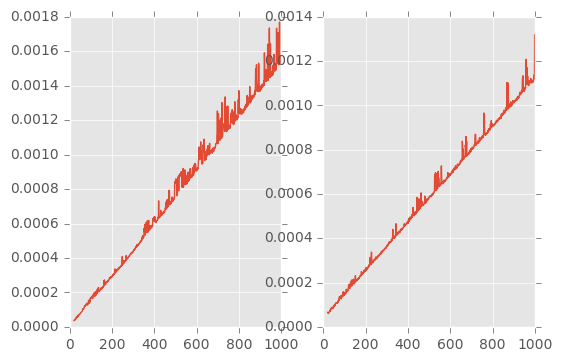

In [19]:
# plot the results
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, genome_sizes, times_lucy)
my_plotter(ax2, genome_sizes, times_numpy)

In [20]:
# both approaches are O(n), ie. linear, in time

## Memory complexity analysis

In [21]:
from memory_profiler import memory_usage

In [22]:
def get_mem_usage(name, xs):
    
    ys = []
    for x in xs:
        genome = build_random_genome(int(x))
        def foo():
            return name(genome)
        ys.append(max(memory_usage(foo)))
  
    return ys

In [23]:
# range of genome lengths to generate
genome_sizes = [1e7]

In [24]:
# get memory usage for each genome length
mem_lucy = get_mem_usage(MinimumSkew, genome_sizes)
mem_numpy = get_mem_usage(min_skew, genome_sizes)

In [25]:
mem_lucy

[987.7109375]

In [26]:
mem_numpy

[325.62890625]

In [27]:
# ~3 times less memory consumption with the numpy code